## 8. Google trends

https://www.data-to-viz.com/

https://github.com/cristianpjensen/stock-market-prediction-via-google-trends#data_collection
https://github.com/le0x99/DailyTrends  

### 0. Import modules and load data

In [1]:
# data manipualtion basics
import pandas as pd
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore') # ignorar warnings

# plotting
import seaborn as sns  # esta basada en matplotlib
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.rcParams['figure.figsize']=(8, 6)  # tamaño por defecto, decenas de pixeles

%matplotlib inline

## my own functions
from src import dataanalysis_fun1 as eda # Import my module

## google trends API github - too many request
#    from DailyTrends.collect import collect_data
    
# other stuff
from datetime import date

In [ ]:
#clothes=pd.read_csv("../data/clean/clothes_simple.csv")

## 1 Google_trends `colors`

In [5]:
#GOTRE1=pd.read_csv("../data/raw/az_ro_ve_bla_ne_GOTRE.csv")
#GOTRE2=pd.read_csv("../data/raw/mo_ma_ro_am_gr_GOTRE.csv")

In [6]:
GOTRE1['date'] = pd.to_datetime(GOTRE1['date'], format='%m/%d/%y')
GOTRE1.index=GOTRE1['date']
GOTRE1.drop("date", axis=1, inplace=True)

GOTRE2['date'] = pd.to_datetime(GOTRE2['date'], format='%m/%d/%y')
GOTRE2.index=GOTRE2['date']
GOTRE2.drop("date", axis=1, inplace=True)

GOTRE=pd.concat([GOTRE1,GOTRE2], 1)
GOTRE.columns=[["blue", "red", "green", "white", "black",'purple','brown','pink','yellow','gray']]

## 2 Google_trends  `types` 

In [85]:
GOTRE3=pd.read_csv("../data/raw/ve_ca_to_sue_sud_GOTRE.csv")

In [86]:
GOTRE3['date'] = pd.to_datetime(GOTRE3['date'], format='%m/%d/%y')
GOTRE3.index=GOTRE3['date']
GOTRE3.drop("date", axis=1, inplace=True)

In [87]:
GOTRE3['sweater'] = GOTRE3['sweater'].replace('<1', '0')
GOTRE3["sweater"] = GOTRE3["sweater"].astype(float)

GOTRE3['sweatshirt'] = GOTRE3['sweatshirt'].replace('<1', '0')
GOTRE3["sweatshirt"] = GOTRE3["sweatshirt"].astype(float)

### Save Google_trends `colors` and `types` of clothing for 2018-2023

In [89]:
#GOTRE.to_csv('../data/clean/googletrencol_201823.csv')
#GOTRE3.to_csv('../data/clean/googletrentyp_201823.csv')

## 3 .Plot time series

In [90]:
GOTRE_typ=pd.read_csv("../data/clean/googletrentyp_201823.csv", index_col=0)
GOTRE_typ=GOTRE_typ[1:]
GOTRE_typ.index.name="date"
GOTRE_typ.index = pd.to_datetime(GOTRE_typ.index)

GOTRE_col=pd.read_csv("../data/clean/googletrencol_201823.csv", index_col=0)
GOTRE_col=GOTRE_col[1:]
GOTRE_col.index.name="date"
GOTRE_col.index = pd.to_datetime(GOTRE_col.index)

In [91]:
GOTRE_typ.head()

,dress,tshirt,top,sweater,sweatshirt,shirt
date,,,,,,
2018-12-16,47,34,3,3.0,1.0,83
2018-12-23,51,36,3,3.0,2.0,94
2018-12-30,88,29,2,3.0,1.0,82
2019-01-06,43,29,2,3.0,2.0,75
2019-01-13,47,23,2,3.0,1.0,72


In [92]:
## COLOR CODES MATCH THE COLOR LABEL
colors_dict = {
    'brown': '#800000',
    'red': '#FF0000',
    'yellow': '#FFFF00',
    'blue': '#0000FF',
    'white': '#FFFFFF',
    'gray': '#808080',
    'purple': '#800080',
    'black': '#000000',
    'pink': '#FFC0CB',
    'green': '#008000',
}

types_dict = {
    'sweater': '#FF0000',
    'sweatshirt': '#0000FF',
    'top': '#808080',
    'dress': '#FFA500',
    'tshirt': '#000000',
    'shirt': '#008000'
}


In [67]:
GOTRE_typ.shape, GOTRE_col.shape

((259, 6), (261, 10))

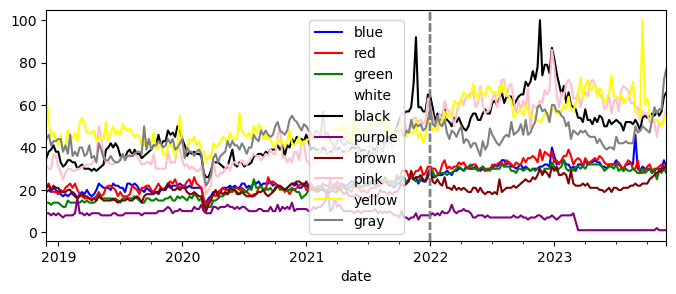

In [105]:
col_list=list(GOTRE_col.columns)

# Convert the date string to a pandas Timestamp
change_date = pd.Timestamp('2022-01-01')
plt.figure(figsize=(8, 3)) 
for i in col_list:
    GOTRE_col[i].plot(color=colors_dict.get(i, 'black'))  # Use black color if not in color_dict
    plt.axvline(x=change_date, color='grey', linestyle='--')

plt.legend()  # Show legend if needed
plt.show()


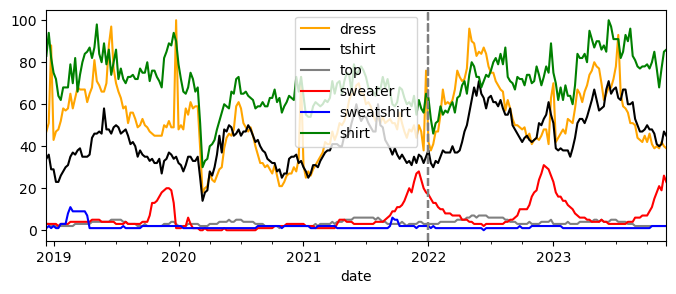

In [106]:
col_list=list(GOTRE_typ.columns)

# Convert the date string to a pandas Timestamp
change_date = pd.Timestamp('2022-01-01')
plt.figure(figsize=(8, 3)) 
for i in col_list:
    GOTRE_typ[i].plot(color=types_dict.get(i, 'black'))  # Use black color if not in color_dict
    plt.axvline(x=change_date, color='grey', linestyle='--')

plt.legend()  
plt.show()


### Auto-regression 

In [96]:
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg as AR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX # includes all, arma, arima, sarimax ...

Use `lag_plot`to eval if there is a dependent relation between the current moment with previous moments for each color

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


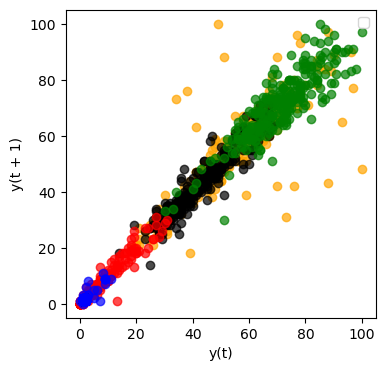

In [107]:
col_list=list(GOTRE_typ.columns)
plt.figure(figsize=(4, 4)) 
for i in col_list:
    lag_plot(GOTRE_typ[i], c=types_dict.get(i, 'black'), alpha=0.7)
plt.legend()  # Show legend if needed
plt.show()


Take out 10 timestamps to check whether the AR is able to correctly predict them

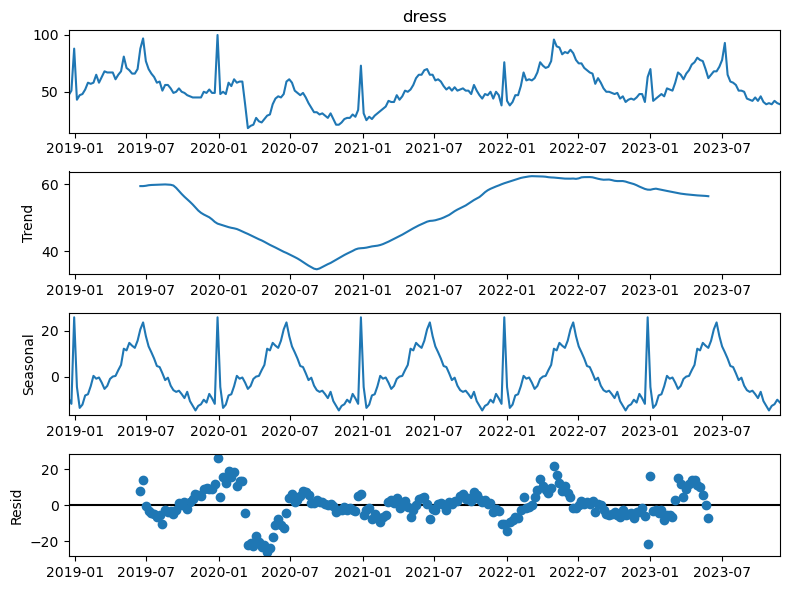

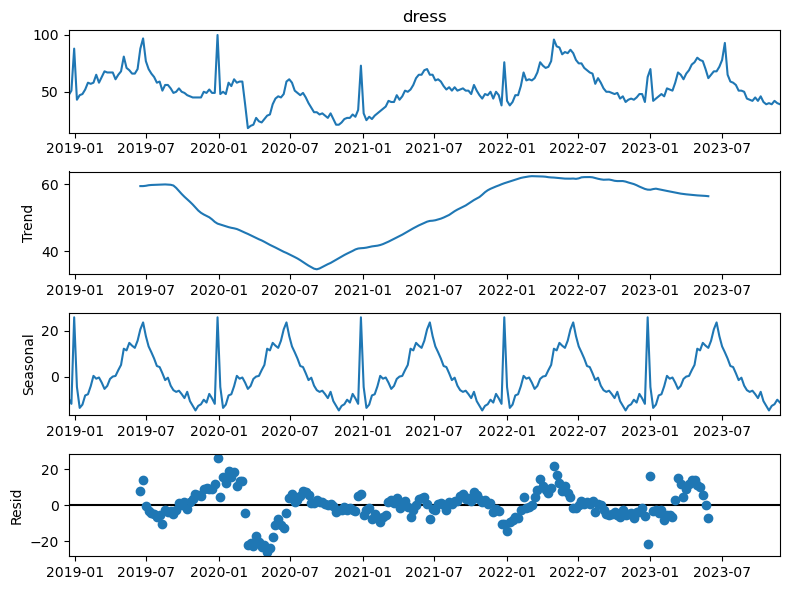

In [127]:
import statsmodels.api as sm

res=sm.tsa.seasonal_decompose(GOTRE_typ.dress)

seasonal_component = res.seasonal
trend_component = res.trend.interpolate()

res.plot()
#seasonal_component.plot()

#seasonal_component

In [50]:
train, test = GOTRE.blue[:-10], GOTRE.blue[-10:]
train.shape, test.shape

((251, 1), (10, 1))

In [52]:
modelo = AR(train, lags=1).fit()
# lags=1 es la cadena de Markov, lags son los pasos atras que mira

In [53]:
len(train), len(GOTRE.blue)-1  

(251, 260)

In [54]:
# por indice para predecir

pred = modelo.predict(len(train), len(GOTRE.blue)-1)

pred

2023-09-24    30.583703
2023-10-01    30.198702
2023-10-08    29.842645
2023-10-15    29.513355
2023-10-22    29.208821
2023-10-29    28.927180
2023-11-05    28.666713
2023-11-12    28.425827
2023-11-19    28.203050
2023-11-26    27.997022
Freq: W-SUN, dtype: float64

In [55]:
test

,blue
date,
2023-09-24,30
2023-10-01,30
2023-10-08,30
2023-10-15,28
2023-10-22,29
2023-10-29,30
2023-11-05,30
2023-11-12,30
2023-11-19,34


In [56]:
# error medio absoluto MAE

error = (pred - test).abs().sum()/len(pred)  

error

2023-09-24 00:00:00    0.0
2023-10-01 00:00:00    0.0
2023-10-08 00:00:00    0.0
2023-10-15 00:00:00    0.0
2023-10-22 00:00:00    0.0
2023-10-29 00:00:00    0.0
2023-11-05 00:00:00    0.0
2023-11-12 00:00:00    0.0
2023-11-19 00:00:00    0.0
2023-11-26 00:00:00    0.0
(blue,)                0.0
dtype: float64

[array([30]),
 array([30]),
 array([30]),
 array([28]),
 array([29]),
 array([30]),
 array([30]),
 array([30]),
 array([34]),
 array([31])]

In [67]:
res=pd.DataFrame({'real': np.array(test), 'pred': np.array(pred), 'error': np.array(pred) - np.array(test)})

res

ValueError: Data must be 1-dimensional

In [70]:
import warnings
warnings.simplefilter('ignore')

for i in range(10, 20, 1):
    
    modelo=AR(train, lags=i).fit()                     # entrenar la AR
    
    pred=modelo.predict(len(train), len(GOTRE.blue)-1)     # la prediccion en el intervalo
    
    error=(pred-test).abs().sum()/len(pred)            # error medio absoluto
    
    print ('Error mae: ', error.round(5), '  Maxlag : ', i)

Error mae:  2023-09-24 00:00:00    0.0
2023-10-01 00:00:00    0.0
2023-10-08 00:00:00    0.0
2023-10-15 00:00:00    0.0
2023-10-22 00:00:00    0.0
2023-10-29 00:00:00    0.0
2023-11-05 00:00:00    0.0
2023-11-12 00:00:00    0.0
2023-11-19 00:00:00    0.0
2023-11-26 00:00:00    0.0
(blue,)                0.0
dtype: float64   Maxlag :  10
Error mae:  2023-09-24 00:00:00    0.0
2023-10-01 00:00:00    0.0
2023-10-08 00:00:00    0.0
2023-10-15 00:00:00    0.0
2023-10-22 00:00:00    0.0
2023-10-29 00:00:00    0.0
2023-11-05 00:00:00    0.0
2023-11-12 00:00:00    0.0
2023-11-19 00:00:00    0.0
2023-11-26 00:00:00    0.0
(blue,)                0.0
dtype: float64   Maxlag :  11
Error mae:  2023-09-24 00:00:00    0.0
2023-10-01 00:00:00    0.0
2023-10-08 00:00:00    0.0
2023-10-15 00:00:00    0.0
2023-10-22 00:00:00    0.0
2023-10-29 00:00:00    0.0
2023-11-05 00:00:00    0.0
2023-11-12 00:00:00    0.0
2023-11-19 00:00:00    0.0
2023-11-26 00:00:00    0.0
(blue,)                0.0
dtype: float6

### ARMA (AutoRegressive Moving Average)

In [71]:
%%time

modelo=ARIMA(train, order=(16, 0, 3)).fit()  # d=0 implica ARMA

CPU times: user 3.71 s, sys: 29.7 ms, total: 3.74 s
Wall time: 3.61 s


In [72]:
test

,blue
date,
2023-09-24,30
2023-10-01,30
2023-10-08,30
2023-10-15,28
2023-10-22,29
2023-10-29,30
2023-11-05,30
2023-11-12,30
2023-11-19,34


In [73]:
pred=modelo.predict(len(train), len(GOTRE.blue)-1) 

error=(pred-test).abs().sum()/len(pred) 

print ('Error mae: ', error)

resARMA=pd.DataFrame({'real':test, 'pred':pred, 'error':pred-test})


Error mae:  2023-09-24 00:00:00    0.0
2023-10-01 00:00:00    0.0
2023-10-08 00:00:00    0.0
2023-10-15 00:00:00    0.0
2023-10-22 00:00:00    0.0
2023-10-29 00:00:00    0.0
2023-11-05 00:00:00    0.0
2023-11-12 00:00:00    0.0
2023-11-19 00:00:00    0.0
2023-11-26 00:00:00    0.0
(blue,)                0.0
dtype: float64


ValueError: Data must be 1-dimensional

### ARIMA (AutoRegressive Integrated Moving Average)

Lo de Integrated trata de hacer la serie temporal estacionaria, similar al concepto de PID.

In [77]:
%%time

modelo=ARIMA(train, order=(4, 1, 2)).fit()

                     
pred=modelo.predict(len(train), len(GOTRE.blue)-1) 

error=(pred-test).abs().sum()/len(pred) 

print ('Error mae: ', error)

resARIMA=pd.DataFrame({'real':test, 'pred':pred, 'error':pred-test})

Error mae:  2023-09-24 00:00:00    0.0
2023-10-01 00:00:00    0.0
2023-10-08 00:00:00    0.0
2023-10-15 00:00:00    0.0
2023-10-22 00:00:00    0.0
2023-10-29 00:00:00    0.0
2023-11-05 00:00:00    0.0
2023-11-12 00:00:00    0.0
2023-11-19 00:00:00    0.0
2023-11-26 00:00:00    0.0
(blue,)                0.0
dtype: float64


ValueError: Data must be 1-dimensional

In [78]:
%%time

modelo=SARIMAX(endog=train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 5, 2) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(train), len(GOTRE.blue)-1)  

error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)


resSARIMAX=pd.DataFrame({'real':test, 'pred':pred, 'error':pred-test})


Error mae:  2023-09-24 00:00:00    0.0
2023-10-01 00:00:00    0.0
2023-10-08 00:00:00    0.0
2023-10-15 00:00:00    0.0
2023-10-22 00:00:00    0.0
2023-10-29 00:00:00    0.0
2023-11-05 00:00:00    0.0
2023-11-12 00:00:00    0.0
2023-11-19 00:00:00    0.0
2023-11-26 00:00:00    0.0
(blue,)                0.0
dtype: float64


ValueError: Data must be 1-dimensional

In [79]:
resSARIMAX

NameError: name 'resSARIMAX' is not defined

In [264]:
pd.concat([resARMA["error"], resARIMA["error"], resSARIMAX["error"]], axis=1)

,error,error,error
2023-09-24,1.423349,1.423349,4.917503
2023-10-01,1.627244,1.627244,1.920440
2023-10-08,1.839317,1.839317,4.854373
2023-10-15,3.939574,3.939574,3.506233
2023-10-22,2.999503,2.999503,7.039616
2023-10-29,2.035595,2.035595,0.825758
2023-11-05,2.057603,2.057603,1.292657
2023-11-12,2.069772,2.069772,1.557578
2023-11-19,-1.922512,-1.922512,0.234758
2023-11-26,1.081759,1.081759,0.357675
